In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
Session = Session(engine)

In [9]:
# Debug statement to verify Station is funcitonal
for row in Session.query(Station.name, Station.latitude, Station.longitude).limit(5).all():
    print(row)

('WAIKIKI 717.2, HI US', 21.2716, -157.8168)
('KANEOHE 838.1, HI US', 21.4234, -157.8015)
('KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374)
('PEARL CITY, HI US', 21.3934, -157.9751)
('UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111)


In [10]:
# Debug statement to verify Measurement is funcitonal
for row in Session.query(Measurement.station, Measurement.date).limit(5).all():
    print(row)

('USC00519397', '2010-01-01')
('USC00519397', '2010-01-02')
('USC00519397', '2010-01-03')
('USC00519397', '2010-01-04')
('USC00519397', '2010-01-06')


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
Session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
recent_date = '2016-08-23'

# Perform a query to retrieve the data and precipitation scores
Year_of_Data = Session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= recent_date).all()
Year_of_Data

# Save the query results as a Pandas DataFrame. Explicitly set the column names
Year_of_Data_df = pd.DataFrame(Year_of_Data)
Year_of_Data_df 

# Sort the dataframe by date
Year_of_Data_df.sort_values(by='date')
Year_of_Data_df.dropna()

# I Dropped the rows where at least one element is missing
Clean_Year_of_Data_df = Year_of_Data_df.dropna()
Clean_Year_of_Data_df 

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2223,2017-08-17,0.13
2225,2017-08-19,0.09
2227,2017-08-21,0.56
2228,2017-08-22,0.50


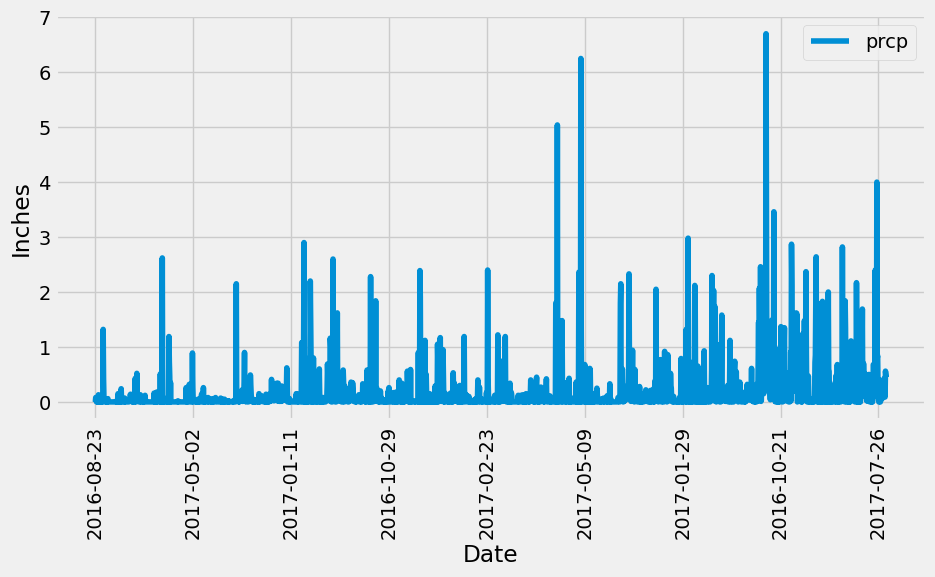

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data

Clean_Year_of_Data_df.plot(x='date', y='prcp', figsize=(10, 5))

plt.xlabel('Date')
plt.ylabel('Inches')

plt.xticks(rotation = "vertical")

plt.legend(loc="upper right")

plt.show()


In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
Clean_Year_of_Data_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
Number_of_Stations = Session.query(Station.name).count()
Number_of_Stations

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Active_Stations = Session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
Active_Stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

Most_Active_Station_Temperature = Session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs).filter(Measurement.station >= 'USC00519281')).all()
Most_Active_Station_Temperature


[(53.0, 87.0, 73.56913655848132)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

Most_Active_Station_Temperature = Session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').all()

Temperature_df = pd.DataFrame(Most_Active_Station_Temperature)

Min_Temp = Temperature_df.min()
Max_Temp = Temperature_df.max()
Avg_Temp = Temperature_df.mean()

print(f"Station USC00519281 minimum temperature is: {Min_Temp}")
print(f"Station USC00519281 maximum temperature is: {Max_Temp}")
print(f"Station USC00519281 average temperature is: {Avg_Temp}")

Station USC00519281 minimum temperature is: tobs    54.0
dtype: float64
Station USC00519281 maximum temperature is: tobs    85.0
dtype: float64
Station USC00519281 average temperature is: tobs    71.663781
dtype: float64


In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 

last_12mo_cutoff = '2016-08-18'

last_12mo_temperatures = Session.query(Measurement.tobs).filter((Measurement.station == 'USC00519281') & (Measurement.date > last_12mo_cutoff)).all()

last_12mo_temperatures_df = pd.DataFrame(last_12mo_temperatures)

last_12mo_temperatures_df


,tobs
0,79.0
1,81.0
2,79.0
3,78.0
4,77.0
...,...
351,77.0
352,77.0
353,76.0
354,76.0


<Axes: ylabel='Frequency'>

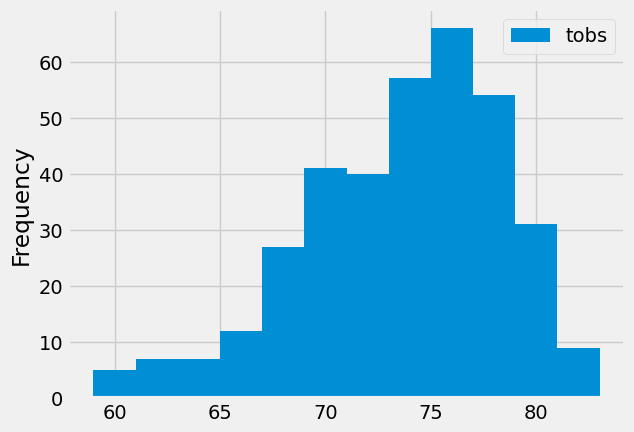

In [20]:
#Plot the results as a histogram
last_12mo_temperatures_df.plot.hist(bins=12)
#last_12_months_temps_df.plot.hist(bins=12)

# Close Session

In [21]:
# Close Session
Session.close()